In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install noisereduce

In [4]:
# STEP 2: Imports & Setup
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from IPython.display import Audio, display
import noisereduce as nr

folder_path = '/content/drive/MyDrive/Audio_files'


In [7]:
# STEP 3: Organize files by category and timestamps
file_structure = defaultdict(dict)
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for f in wav_files:
    parts = f.replace('.wav', '').split('_')
    main_category = "_".join(parts[:2])
    timestamp = "_".join(parts[2:])  # e.g., 11912.5_11926.5
    full_path = os.path.join(folder_path, f)
    file_structure[main_category][timestamp] = full_path

# Map numbers to categories
category_map = {
    '1': 'Respiratory_Hypopnea',
    '2': 'Respiratory_ObstructiveApnea',
    '3': 'Respiratory_MixedApnea'
}


In [8]:
# STEP 4: Feature display helper
def show_features(y, sr, title):
    y_trimmed, _ = librosa.effects.trim(y)

    # Estimate noise from first 0.5s
    noise_sample = y_trimmed[:int(0.5 * sr)]

    # Apply spectral noise reduction
    y_denoised = nr.reduce_noise(y=y_trimmed, sr=sr, y_noise=noise_sample)

    # Now use the cleaned version
    y = y_denoised
    print(" Playing audio:")
    display(Audio(y, rate=sr))

    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'{title} - Waveform')
    plt.tight_layout()
    plt.show()

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')
    plt.tight_layout()
    plt.show()

    zcr = librosa.feature.zero_crossing_rate(y)
    mean_zcr = np.mean(zcr)
    print(f" Mean Zero Crossing Rate: {mean_zcr:.5f}")
    plt.figure(figsize=(10, 3))
    plt.plot(librosa.times_like(zcr), zcr[0])
    plt.title(f'{title} - Zero Crossing Rate')
    plt.tight_layout()
    plt.show()



 Choose a category to explore:
1: Respiratory_Hypopnea
2: Respiratory_ObstructiveApnea
3: Respiratory_MixedApnea
q: Quit
Enter choice (1/2/3/q): 1

 Exploring: Respiratory_Hypopnea (35 segments)

 Subcategory: 10810.5_10820.5
 Playing audio:


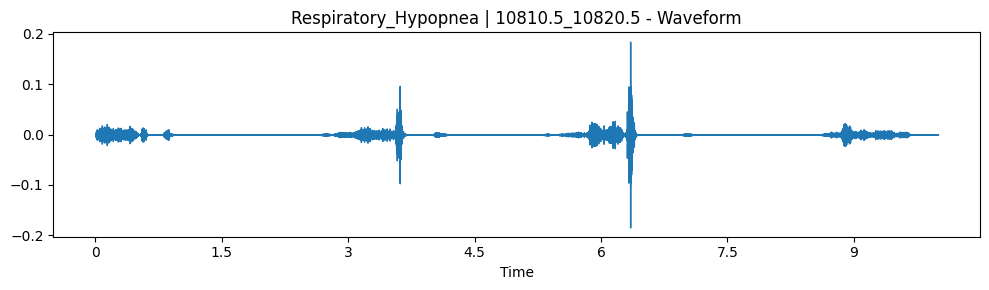

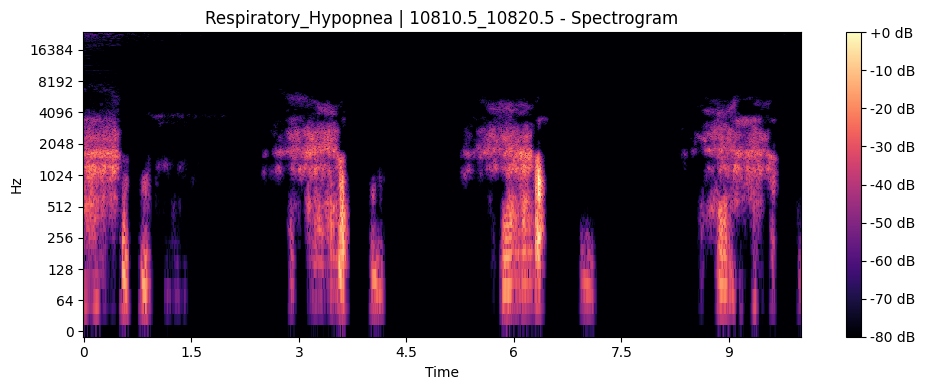

 Mean Zero Crossing Rate: 0.28442


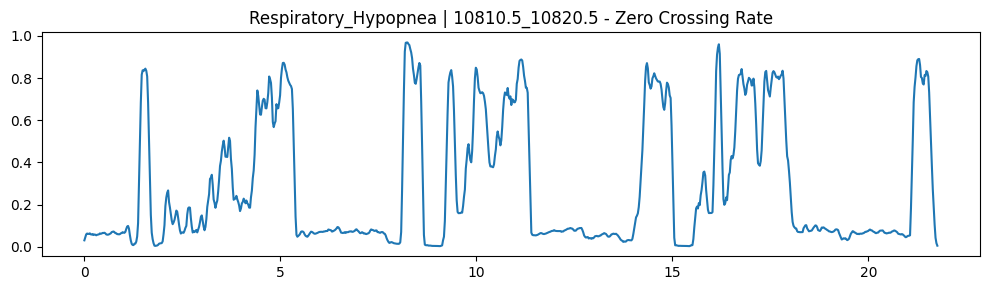

Press Enter for next, or 'm' to go back to menu: m

 Choose a category to explore:
1: Respiratory_Hypopnea
2: Respiratory_ObstructiveApnea
3: Respiratory_MixedApnea
q: Quit
Enter choice (1/2/3/q): 2

 Exploring: Respiratory_ObstructiveApnea (17 segments)

 Subcategory: 11829.0_11839.0
 Playing audio:


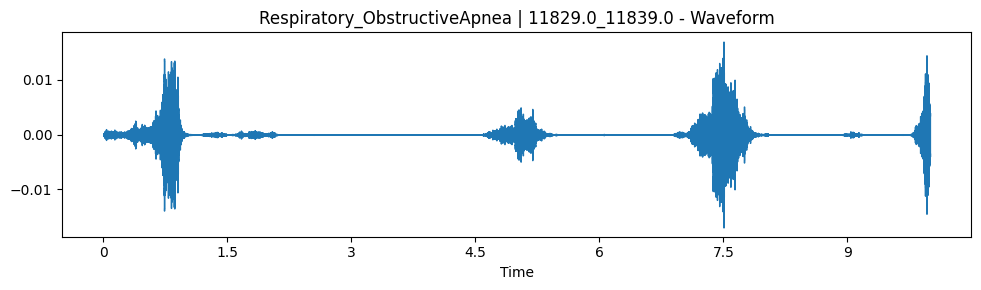

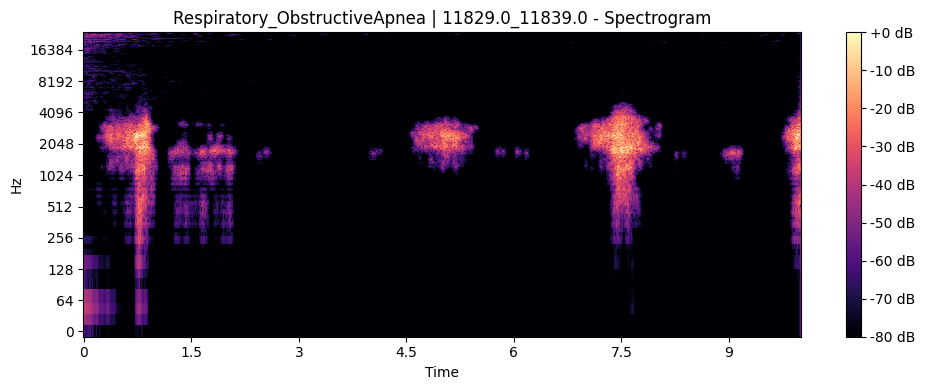

 Mean Zero Crossing Rate: 0.41107


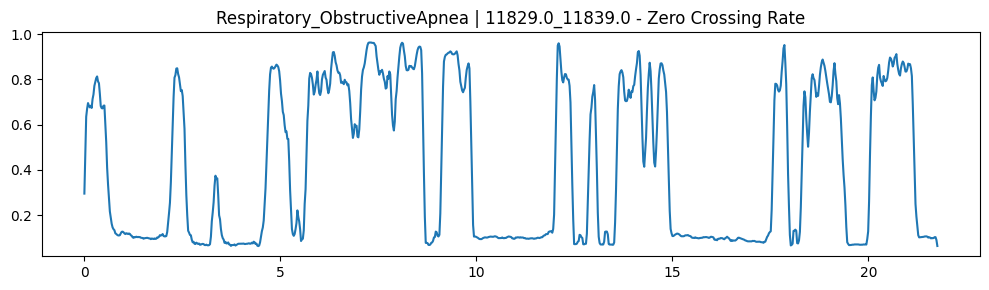

Press Enter for next, or 'm' to go back to menu: m

 Choose a category to explore:
1: Respiratory_Hypopnea
2: Respiratory_ObstructiveApnea
3: Respiratory_MixedApnea
q: Quit
Enter choice (1/2/3/q): 3

 Exploring: Respiratory_MixedApnea (2 segments)

 Subcategory: 14130.5_14141.0
 Playing audio:


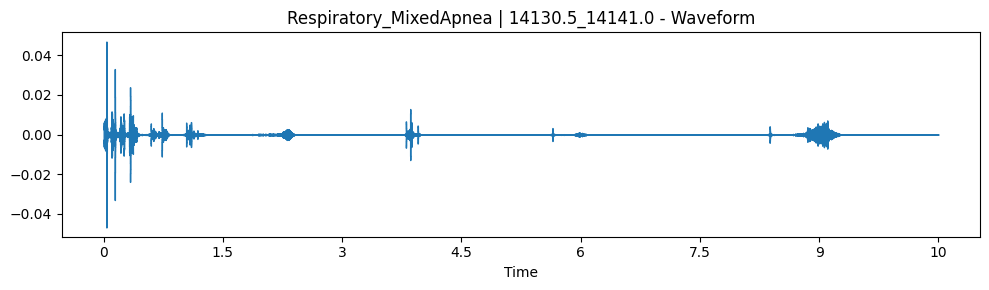

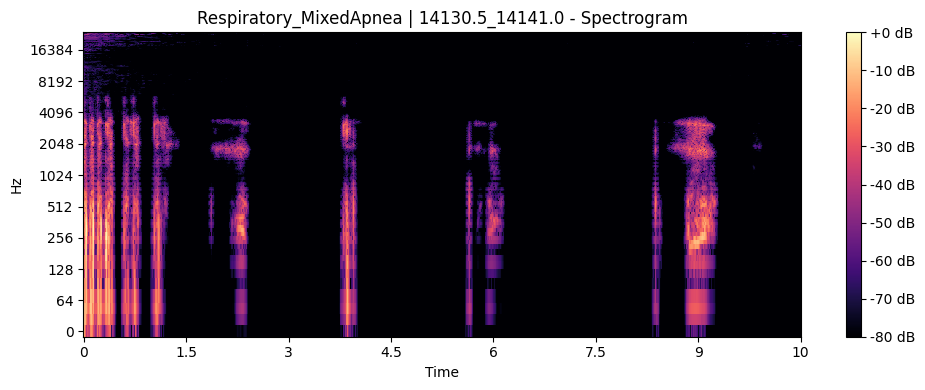

 Mean Zero Crossing Rate: 0.45023


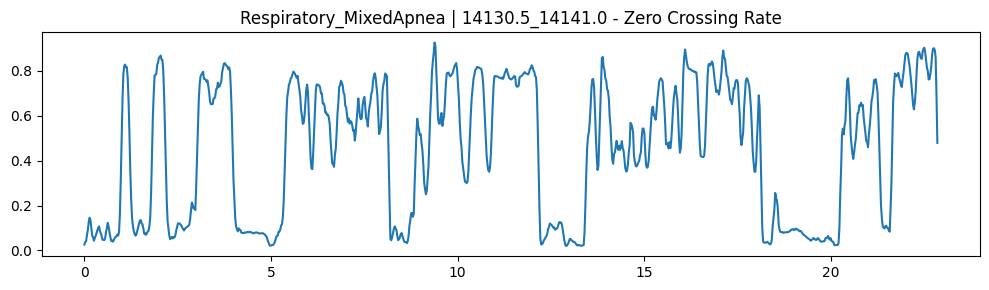

Press Enter for next, or 'm' to go back to menu: m

 Choose a category to explore:
1: Respiratory_Hypopnea
2: Respiratory_ObstructiveApnea
3: Respiratory_MixedApnea
q: Quit
Enter choice (1/2/3/q): q
Exiting session.


In [10]:
# STEP 5: Category Navigation

while True:
    print("\n Choose a category to explore:")
    print("1: Respiratory_Hypopnea")
    print("2: Respiratory_ObstructiveApnea")
    print("3: Respiratory_MixedApnea")
    print("q: Quit")

    choice = input("Enter choice (1/2/3/q): ").strip().lower()

    if choice == 'q':
        print("Exiting session.")
        break

    if choice not in category_map:
        print("❗ Invalid input. Please enter 1, 2, 3, or q.")
        continue

    selected_category = category_map[choice]
    subcats = sorted(file_structure[selected_category].items())

    print(f"\n Exploring: {selected_category} ({len(subcats)} segments)")

    for timestamp, file_path in subcats:
        print(f"\n Subcategory: {timestamp}")
        y, sr = librosa.load(file_path, sr=None)
        show_features(y, sr, f"{selected_category} | {timestamp}")

        proceed = input("Press Enter for next, or 'm' to go back to menu: ").strip().lower()
        if proceed == 'm':
            break  # Return to category selection